## Lanczos Filtering 

Designing a FIR filter for our shift.

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft as fft

In [131]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

fs:  (-1.0237626751762921e-16+0j) -1.0237626751762921e-16
(1+0j) (0.9973701827725034+0j)


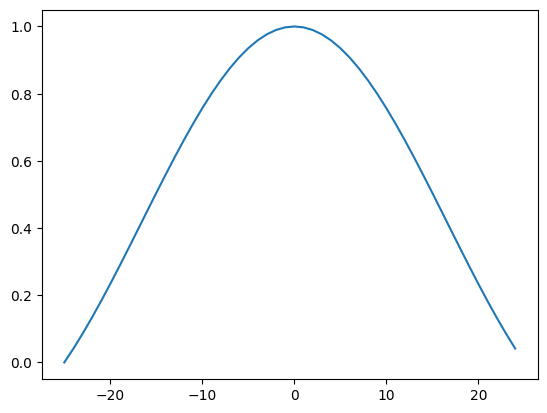

In [132]:
n  = 50
x = np.arange(n)

G = np.ones(n, dtype=complex)
for i in range(n):
    k = wavenum(i, n)
    a = np.pi / n * k * 2
    if k:
        G[i] = (np.sin(a) / a)
    if k == -n//2 :
        print("fs: ", G[i], np.sin(-a) / -a)
        
        
print(G[0], G[n-1])
#plot frequency response
plt.plot(np.arange(n) - n//2, fft.fftshift(G).real)

M is  3
fs:  1.8686949516487943e-17 -1.494955961319035e-16


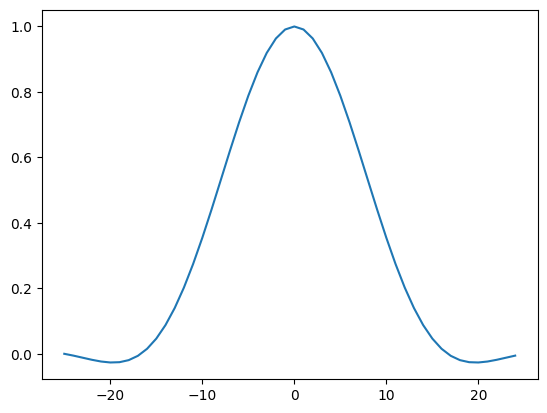

In [133]:
#lanczos smoothing
G = np.zeros(n)
M = 0
delta = 0.5
#we pick the support of the smoothing window depending on the fractional shift
mydistance = np.abs(np.mod(delta, 1) - 0.5)
if mydistance < 0.5 - 1/64:
    M = 1
if mydistance < 0.5 - 0.0125:
    M = 2
if mydistance < 0.5 - 0.25:
    M = 3
print("M is ", M)
if M:
    for i in range(n):
        k = wavenum(i,n)
        a = 2 * np.pi / n * k * M
        #weighted average of (1/2 + 1/2 cos(pi / M * x))
        if True:
            if 4 * k == -n or 4 * k == n:
                G[i] += 1
            else:
                G[i] += 2 * a * np.sin(a) / (np.pi**2 - a**2)
        if True:
            if i:
                G[i] += 2 * np.sin(a) / (a)
            else:
                G[i] += 2
        G[i] *= 0.5
        if k == -n//2 :
            print("fs: ", G[i], np.sin(-a) / -a)
else :
    G = np.ones(n)
#plot frequency response
from numpy import fft as fft
plt.plot(np.arange(n) - n//2, fft.fftshift(G))

In [134]:
def fir_filter(n, delta):
    M = 0
    mydistance = np.abs(np.mod(delta, 1) - 0.5)
    
    n_win = 10
    # Build window array
    win = [0]*n_win
    for i in range(n_win):
        win[i] = 0.5 - 0.25 * 1 / (1 + i)
        
        
    return win 

In [30]:
fir_filter(50, 0.5)

[0.25,
 0.375,
 0.4166666666666667,
 0.4375,
 0.45,
 0.4583333333333333,
 0.4642857142857143,
 0.46875,
 0.4722222222222222,
 0.475]